In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(multivariate-normal-marginalization)=
# The Multivariate Normal - Marginalization

Consider the $N$-dimensional multivariate normal:

$$
\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right),
$$

where $\boldsymbol{\mu}$ is a $N$-dimensional vector, $\boldsymbol{\Sigma}$ is a *positive-definite matrix*.
Let's look at a component of $\mathbf{X}$, say $X_1$.
What is its PDF?
We can find it by *marginalizing* over the other components of $\mathbf{X}$:

$$
p(x_1) = \int_{-\infty}^{\infty} \cdots \int_{-\infty}^{\infty} p(x_1, x_2, \ldots, x_N) \, dx_2 \cdots dx_N.
$$

If you really do the integrals, you will find that the marginal PDF of $X_1$ is a Gaussian with mean $\mu_1$ and variance $\Sigma_{11}$:

$$
X_1 \sim N\left(\mu_1, \Sigma_{11}\right).
$$

Similarly, the marginal PDF of $X_2$ is a Gaussian with mean $\mu_2$ and variance $\Sigma_{22}$.
And so on.

Let's demonstrate this by sampling in the random vector $\mathbf{X}$ and making the histogram of its $X_1$ component.


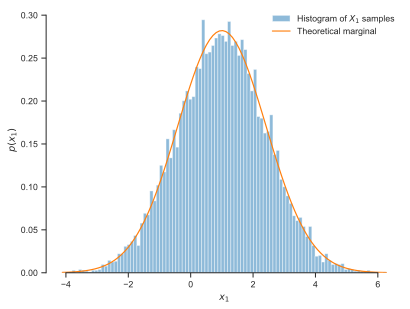

In [4]:
import numpy as np
import scipy.stats as st

# The mean vector
mu = np.array([1.0, 2.0])
# The covariance matrix
Sigma = np.array(
    [
        [2.0, 0.9],
        [0.9, 4.0]
    ]
)

# The multivariate normal random vector
X = st.multivariate_normal(
    mean=mu,
    cov=Sigma
)

# Take some samples
num_samples = 10000
x_samples = X.rvs(size=num_samples)

# Now, just take the X1 components of these samples:
x1_samples = x_samples[:, 0]
# And draw their histogram
fig, ax = plt.subplots()
ax.hist(
    x1_samples,
    density=True,
    bins=100,
    alpha=0.5,
    label="Histogram of $X_1$ samples"
)

# Compare to the theoretical marginal with mean:
mu1 = mu[0]
# And variance:
Sigma11 = Sigma[0, 0]
X1_theory = st.norm(
    loc=mu1,
    scale=np.sqrt(Sigma11)
)
x1s = np.linspace(
    x1_samples.min(),
    x1_samples.max(),
    100
)
ax.plot(
    x1s,
    X1_theory.pdf(x1s),
    label="Theoretical marginal"
)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$p(x_1)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

## Questions 

+ Expand the code so that you produce the figure that gives you the marginal of the $X_2$ component of $\mathbf{X}$.

## Getting the joint PDF of a subset of components of a multivariate Gaussian

Take the same multivariate Gaussian as in the previous exercise, but now we are interested in the joint PDF of the first two components, $X_1$ and $X_2$.
The joint PDF of $X_1$ and $X_2$ is given by the following expression:

$$
p(x_1, x_2) = \int_{-\infty}^{\infty} \cdots \int_{-\infty}^{\infty} p(x_1, x_2, x_3, \ldots, x_N) \, dx_3 \cdots dx_N.
$$

If we do the integration, we get that $(X_1, X_2)$ is a bivariate Gaussian with mean vector $(\mu_1,\mu_2)$ and covariance matrix:

$$
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{12}^T & \Sigma_{22}
\end{bmatrix}.
$$

This sort of marginalization extends to any subset of components of a multivariate Gaussian.